## Medium array problems

### 2 sum problem
Consider arr = [2,6,5,8,11] and target = 14. Does there exist any two elements whose sum is equal to target

In [ ]:
# Brute force: using nested loop
arr = [2,6,5,8,11]
target = 14
for i in range(len(arr)):
    f = 0
    for j in range(i+1,len(arr)):
        if arr[i]+arr[j] == target:
            print("Yes")
            print([i,j]) # Return indeces of those two elements
            f = 1
            break
    if f:
        break
# Time complexity is O(n^2)
# Space complexity is O(1)

Yes
[1, 3]


In [ ]:
# Using hashing
# Store each element in hash
# subtract each element with the target and check if the difference exist in hash or not
hashmp = {} # element with index
for i in range(len(arr)):
    if (target-arr[i]) in hashmp:
        print("Yes")
        print(i,hashmp[target-arr[i]])
        break
    else:
        hashmp[arr[i]]=i
# Time complexity at worst case is O(n)
# Space complexity at worst case is O(n)


Yes
3 1


In [ ]:
# Using 2 pointer
arr.sort() # sort array before applying 2 pointer
i = 0 # starts from 0 
j = len(arr)-1 # start from last
while i<len(arr) and j>0:
    if arr[i]+arr[j] == target:
        print(i,j)
        break
    elif arr[i]+arr[j] < target: # if sum is less than target then move i else move j
        i+=1
    else:
        j-=1
# time complexity if we use merge or quick sort can be log(n), for loop will be O(n)
# total time complexity is O(n)
# space complexity: O(1)

1 3


### Sort an array of 0s, 1s and 2s
arr = [0,1,2,0,1,2,1,2,0,0,0,1] we have to sort this array

In [ ]:
arr = [0,1,2,0,1,2,1,2,0,0,0,1]
print(len(arr))
# count the number of 0s, 1s and 2s
c0 = 0
c1 = 0
c2 = 0
for i in arr:
    if i == 0:
        c0+=1
    elif i == 1:
        c1+=1
    elif i == 2:
        c2+=1
# in the array the first place will contain 0s, the next 1s and next 2s
index = 0 # keep updating the index
for i in range(c0):
    arr[index] = 0
    index+=1
for j in range(c1):
    arr[index] = 1
    index+=1
for k in range(c2):
    arr[index] = 2
    index+=1
print(arr)
# The total time complexity is O(2n), n for 1st loop, n for next 3 loops
# Space complexity is O(1)

12
5 4 3 12
[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2]


#### Dutch national flag algorithm
This algorithm involves 3 pointers => low, mid, high  
It follows 3 rules:  
1. Everything from 0.....low-1 is 0
2. Everything from low......mid-1 is 1
3. Everything from high+1......n-1 is 2  
![Screenshot from 2025-08-22 14-31-44.png](<attachment:Screenshot from 2025-08-22 14-31-44.png>)  

The arr is unsorted so mid will point at 0 and high will point at n-1

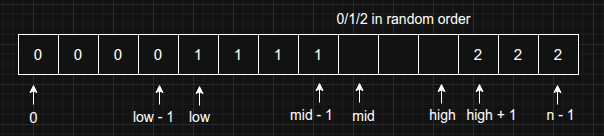